In [1]:
# Import Liberaries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df= pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


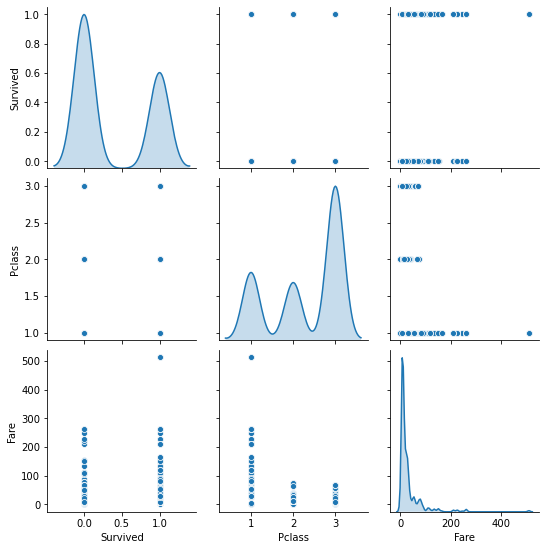

In [6]:
#Data distribution for some of the columns in our DataFrame.
sns.pairplot(df[['Survived', 'Pclass', 'Fare']], diag_kind= 'kde')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Handling Numerical Columns
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.drop(columns=['Cabin'])
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
#Handling Categorical Columns
df['Embarked'] = df['Embarked'].fillna('Others')

In [10]:
#Removing Unwanted Columns 
df = df.drop(columns =['PassengerId', 'Name', 'Ticket'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
#Converting Categorical Columns
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
df[['Sex', 'Embarked']] = OrdinalEncoder.fit_transform(df[['Sex', 'Embarked']])
df[['Sex', 'Embarked']]

,Sex,Embarked
0,1.0,3.0
1,0.0,0.0
2,0.0,3.0
3,0.0,3.0
4,1.0,3.0
...,...,...
886,1.0,3.0
887,0.0,3.0
888,0.0,3.0
889,1.0,0.0


In [12]:
#Normalizing Numerical Columns
standardscaler = StandardScaler()
df[['Pclass','Age','SibSp','Parch','Fare']] = standardscaler.fit_transform(df[['Pclass','Age','SibSp','Parch','Fare']])
df[['Pclass','Age','SibSp','Parch','Fare']]

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.827377,0.000000,0.432793,2.008933,-0.176263
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,1.0,-0.592481,0.432793,-0.473674,-0.502445,3.0
1,1,-1.566107,0.0,0.638789,0.432793,-0.473674,0.786845,0.0
2,1,0.827377,0.0,-0.284663,-0.474545,-0.473674,-0.488854,3.0
3,1,-1.566107,0.0,0.407926,0.432793,-0.473674,0.420730,3.0
4,0,0.827377,1.0,0.407926,-0.474545,-0.473674,-0.486337,3.0


In [14]:
X =df.iloc[:, 1:]
y=df.iloc[:,0:1].values.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [15]:
classifier= LGBMClassifier()
classifier.fit(X_train, y_train, categorical_feature=['Embarked','Sex'])

C:\Users\Mohamed Hasballah\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Mohamed Hasballah\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Embarked', 'Sex']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier()

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0])

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  2],
       [ 4, 14]], dtype=int64)

In [18]:
#test set data

test_set['Age'] = test_set['Age'].fillna(test_set['Age'].mean())
test_set = test_set.drop(columns = ['Cabin'])
test_set.head(5)

#Handling Categorical Columns
test_set['Embarked'] = test_set['Embarked'].fillna('Others')

#Removing Unwanted Columns 
test_set = test_set.drop(columns =['PassengerId', 'Name', 'Ticket'])
test_set.head(5)

#Converting Categorical Columns
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
test_set[['Sex', 'Embarked']] = OrdinalEncoder.fit_transform(test_set[['Sex', 'Embarked']])
test_set[['Sex', 'Embarked']]

#Normalizing Numerical Columns
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
test_set[['Pclass','Age','SibSp','Parch','Fare']] = standardscaler.fit_transform(test_set[['Pclass','Age','SibSp','Parch','Fare']])
test_set[['Pclass','Age','SibSp','Parch','Fare']]

y_predd = classifier.predict(test_set)

In [19]:
y_predd

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [20]:
y_predd = pd.DataFrame(y_predd)
y_predd.to_csv('Survived.csv', index = False)

In [21]:
y_predd

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [28]:
gender_submission.Survived = y_predd
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
gender_submission.to_csv("survived.csv", index = False)

In [39]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
